# Homework 1: Aircraft inventory analysis

In this homework, we will explore the aircraft inventory dataset from 2006 to 2023 (Source: Bureau of Transportation Statistics, www.bts.gov).  

**Some useful resources:**
- You may find explanation of the dataset attributes available in [BTS dataset attribute summary](https://www.transtats.bts.gov/Fields.asp?gnoyr_VQ=GEH).
- You may verify some of your analyses by comparing your results with the BTS analysis dashboard.  The dashboard is reachable via the "Analysis" column in the attribute summary linked above.

**General rules of thumb for homeworks:**
- Read the homework questions carefully.
- Explain your choices.
- Present your findings concisely.
- Use tables, plots, and summary statistics to aid your presentation of findings.
- If you have an idea in mind but could not implement (in code), present the idea thoroughly and how you would have implemented the code. 

### Tasks:

For all tasks below, create one or more functions for any systematic changes to the dataset.  For instance, someone could run the sequence of functions to transform the dataset.

Specify the sequence of functions.

1. Investigate the missing data in this dataset. Specifically, for each of the following variables that have missing data, decide if any imputation is possible.  Give your reasoning and code for how you decide to impute missing values.  
    - Columns for investigation: `CARRIER`, `CARRIER_NAME`, `MANUFACTURE_YEAR`, `NUMBER_OF_SEATS`, `CAPACITY_IN_POUNDS`, and `AIRLINE_ID`.
    - For example, watch out for "North American Airlines" aircrafts.  Are the `CARRIER`/`UNIQUE_CARRIER` column *really* missing?

2. Inspect the columns `MANUFACTURER`, `MODEL`, `AIRCRAFT_STATUS`, and `OPERATING_STATUS`.  Decide, for each column, if transformation or standardization of data are required.  Give your reasoning and code if you decide to transform the data.  

    **Hints:**
    - For very messy data like manufacturer/model names, give your best attempt. It is okay to not catch them all.
    - Use `value_counts()` to identify "big wins".
    - Break down into multiple steps, instead of having one line of code to do them all.

3. Remove data rows that still have missing values.  Report the amount of remaining data you obtained.

4. Transformation and derivative variables
   - For the columns `NUMBER_OF_SEATS` and `CAPACITY_IN_POUNDS`, check the skewness in the variable and plot a histogram for each variable.
   - The Box-Cox transformation (`scipy.stats.boxcox`) is one possible way to transform variables into a "more-normal-like" variable.  Apply the Box-Cox transformation for these two columns and save them as new columns, i.e. `XXXXXXXXX_BOXCOX`.
   - Plot a histogram for each transformed variable.
   - Describe what you observe before and after transformation.

5. Feature engineering
    - Create a new column `SIZE` by the quartiles of `NUMBER_OF_SEATS`
        - below 25% percentile: `SMALL`
        - 25% - 50% percentile: `MEDIUM`
        - 50% - 75% percentile: `LARGE`
        - above 75% percentile: `XLARGE`
    - For each size group, provide and plot the proportions of aircrafts that are operating versus not (`OPERATING_STATUS`). 
    - For each size group, provide and plot the proportions of aircrafts belonging to each aircraft status group (`AIRCRAFT_STATUS`).
    - Provide a written summary of your findings.

### Dataset
You may read in the dataset with the following code.  Otherwise, you can find the [dataset](https://github.com/mosesyhc/de300-2026wi/raw/refs/heads/main/datasets/T_F41SCHEDULE_B43.zip) available in the `dataset` directory.  *Note* that `pandas.read_csv()` is capable of reading a zipped .csv file and no unzipping is required.

In [45]:
import pandas as pd
inventory = pd.read_csv('dataset/T_F41SCHEDULE_B43.zip')

C:\Users\kcui2\AppData\Local\Temp\ipykernel_27636\2100157953.py:2: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  inventory = pd.read_csv('dataset/T_F41SCHEDULE_B43.zip')


In [46]:
inventory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132313 entries, 0 to 132312
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   YEAR                 132313 non-null  int64  
 1   CARRIER              132264 non-null  object 
 2   CARRIER_NAME         132208 non-null  object 
 3   MANUFACTURE_YEAR     132310 non-null  float64
 4   UNIQUE_CARRIER_NAME  132208 non-null  object 
 5   SERIAL_NUMBER        132313 non-null  object 
 6   TAIL_NUMBER          132313 non-null  object 
 7   AIRCRAFT_STATUS      132313 non-null  object 
 8   OPERATING_STATUS     132313 non-null  object 
 9   NUMBER_OF_SEATS      132306 non-null  float64
 10  MANUFACTURER         132313 non-null  object 
 11  AIRCRAFT_TYPE        102380 non-null  object 
 12  MODEL                132302 non-null  object 
 13  CAPACITY_IN_POUNDS   132212 non-null  float64
 14  ACQUISITION_DATE     131346 non-null  object 
 15  AIRLINE_ID       

In [47]:
inventory.head()

,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
0,2006,16,PSA Airlines Inc.,2003.0,PSA Airlines Inc.,7858,N202PS,B,Y,50.0,CANADAIR,NaN,CRJ-2/4,47000.0,10/28/2003 12:00:00 AM,20397.0,16
1,2006,16,PSA Airlines Inc.,2003.0,PSA Airlines Inc.,7860,N206PS,B,Y,50.0,CANADAIR,NaN,CRJ-2/4,47000.0,10/30/2003 12:00:00 AM,20397.0,16
2,2006,16,PSA Airlines Inc.,2003.0,PSA Airlines Inc.,7873,N207PS,B,Y,50.0,CANADAIR,NaN,CRJ-2/4,47000.0,11/26/2003 12:00:00 AM,20397.0,16
3,2006,16,PSA Airlines Inc.,2003.0,PSA Airlines Inc.,7874,N209PS,B,Y,50.0,CANADAIR,NaN,CRJ-2/4,47000.0,12/4/2003 12:00:00 AM,20397.0,16
4,2006,16,PSA Airlines Inc.,2003.0,PSA Airlines Inc.,7879,N213PS,B,Y,50.0,CANADAIR,NaN,CRJ-2/4,47000.0,12/16/2003 12:00:00 AM,20397.0,16


In [48]:
inventory.describe()

,YEAR,MANUFACTURE_YEAR,NUMBER_OF_SEATS,CAPACITY_IN_POUNDS,AIRLINE_ID
count,132313.000000,132310.000000,132306.000000,132212.000000,132208.000000
mean,2014.657706,2000.399992,110.619859,71313.508131,20051.606559
std,5.270037,39.630346,77.424860,87093.991985,380.917190
min,2006.000000,0.000000,0.000000,0.000000,19386.000000
25%,2010.000000,1995.000000,50.000000,34446.000000,19805.000000
50%,2015.000000,2001.000000,125.000000,43400.000000,19977.000000
75%,2019.000000,2007.000000,160.000000,82012.000000,20366.000000
max,2023.000000,2756.000000,737.000000,875000.000000,22085.000000


In [49]:
inventory.isna().sum()

YEAR                       0
CARRIER                   49
CARRIER_NAME             105
MANUFACTURE_YEAR           3
UNIQUE_CARRIER_NAME      105
SERIAL_NUMBER              0
TAIL_NUMBER                0
AIRCRAFT_STATUS            0
OPERATING_STATUS           0
NUMBER_OF_SEATS            7
MANUFACTURER               0
AIRCRAFT_TYPE          29933
MODEL                     11
CAPACITY_IN_POUNDS       101
ACQUISITION_DATE         967
AIRLINE_ID               105
UNIQUE_CARRIER           164
dtype: int64

In [50]:
# looking into CARRIER column
carrier_missing = pd.isnull(inventory["CARRIER"])
inventory[carrier_missing]

# gotcha! in the dataset, the carrier and unique carrier id's aren't missing, they are just actually "NA"
# so no CARRIER is actually missing from the data set, and we need to take care of this separately

# first standardize the carrier codes in case (whitespace/blank strings --> NaN)
def standardCarrierCodes(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()
    for col in ["CARRIER", "UNIQUE_CARRIER"]:
        df[col] = df[col].astype("string").str.strip()
        df.loc[df[col] == "", col] == pd.NA
    return df

# take care of North American separately
def northAmericanCarrier(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()

    if "CARRIER" in df.columns:
        df["CARRIER"] = df["CARRIER"].fillna("NA")

    return df

In [51]:
inventoryNA = northAmericanCarrier(inventory)
inventoryNA.isna().sum()

YEAR                       0
CARRIER                    0
CARRIER_NAME             105
MANUFACTURE_YEAR           3
UNIQUE_CARRIER_NAME      105
SERIAL_NUMBER              0
TAIL_NUMBER                0
AIRCRAFT_STATUS            0
OPERATING_STATUS           0
NUMBER_OF_SEATS            7
MANUFACTURER               0
AIRCRAFT_TYPE          29933
MODEL                     11
CAPACITY_IN_POUNDS       101
ACQUISITION_DATE         967
AIRLINE_ID               105
UNIQUE_CARRIER           164
dtype: int64

In [52]:
# take care of UNIQUE_CARRIER missing values by filling from CARRIER
# logic: for a given carrier + year, there can be one unique carrier code in this dataset
# so we can check for the carrier and year, make comparison, and determine a unique carrier code from that

# notes from just looking at the spreadsheet
# L4 --> L4: no other L4 unique carrier code, carrier name exists, no historical reuse conflicts
# OH missing (54612-54708), OH(1) is used by COMAIR (sometimes? OH is also used), OH is used by PSA Airlines
# i can't seem to find a way to identify carrier information for the missing OHs == these values should be DROPPED

# drop rows if unable to impute UNIQUE_CARRIERS due to ambiguous information
def dropAmbiguousUniqueCarrier(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()

    # this is only noticed when CARRIER == "OH"
    ambiguous = df["CARRIER"].eq("OH") & df["UNIQUE_CARRIER"].isna()

    # updates dataframe to one without the ambiguous values
    df = df.loc[~ambiguous]

    return df

def fillUniqueCarrier(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()

    df["UNIQUE_CARRIER"] = df["UNIQUE_CARRIER"].fillna(df["CARRIER"])

    return df

In [53]:
inventoryUC_OH = dropAmbiguousUniqueCarrier(inventoryNA)
inventoryCCdone = fillUniqueCarrier(inventoryUC_OH)
inventoryCCdone.isna().sum()

YEAR                       0
CARRIER                    0
CARRIER_NAME               8
MANUFACTURE_YEAR           3
UNIQUE_CARRIER_NAME        8
SERIAL_NUMBER              0
TAIL_NUMBER                0
AIRCRAFT_STATUS            0
OPERATING_STATUS           0
NUMBER_OF_SEATS            7
MANUFACTURER               0
AIRCRAFT_TYPE          29933
MODEL                     11
CAPACITY_IN_POUNDS       101
ACQUISITION_DATE         967
AIRLINE_ID                 8
UNIQUE_CARRIER             0
dtype: int64

In [54]:
# look into carrier name
carrier_name_missing = pd.isnull(inventoryCCdone["CARRIER_NAME"])
inventoryCCdone[carrier_name_missing]

# carrier name can be determined if there are existing flights with the same serial and/or tail number
def fillCarrierName(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()

    # df with known carrier name values
    known = df.dropna(subset=["CARRIER", "SERIAL_NUMBER", "TAIL_NUMBER", "CARRIER_NAME"])

    name_map = (
        known.groupby(["CARRIER", "SERIAL_NUMBER", "TAIL_NUMBER"])["CARRIER_NAME"]
        .first()
    )

    # fill missing
    missing = df["CARRIER_NAME"].isna()
    df.loc[missing, "CARRIER_NAME"] = (
        df.loc[missing]
        .set_index(["CARRIER", "SERIAL_NUMBER", "TAIL_NUMBER"])
        .index.map(name_map)
    )

    return df

def fillUniqueCarrierName(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()

    df["UNIQUE_CARRIER_NAME"] = df["UNIQUE_CARRIER_NAME"].fillna(df["CARRIER_NAME"])

    return df

In [55]:
inventory_CN = fillCarrierName(inventoryCCdone)
inventory_CN = fillUniqueCarrierName(inventoryCCdone)
inventory_CN.isna().sum()

YEAR                       0
CARRIER                    0
CARRIER_NAME               8
MANUFACTURE_YEAR           3
UNIQUE_CARRIER_NAME        8
SERIAL_NUMBER              0
TAIL_NUMBER                0
AIRCRAFT_STATUS            0
OPERATING_STATUS           0
NUMBER_OF_SEATS            7
MANUFACTURER               0
AIRCRAFT_TYPE          29933
MODEL                     11
CAPACITY_IN_POUNDS       101
ACQUISITION_DATE         967
AIRLINE_ID                 8
UNIQUE_CARRIER             0
dtype: int64

In [56]:
# MANUFACTURE_YEAR can be filled the same way by comparing serial and tail number
def fillManufactureYear(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()

    # df with known carrier name values
    known = df.dropna(subset=["SERIAL_NUMBER", "TAIL_NUMBER", "MANUFACTURE_YEAR"])

    year_map = (
        known.groupby(["SERIAL_NUMBER", "TAIL_NUMBER"])["MANUFACTURE_YEAR"]
        .first()
    )

    # fill missing
    missing = df["MANUFACTURE_YEAR"].isna()
    df.loc[missing, "MANUFACTURE_YEAR"] = (
        df.loc[missing]
        .set_index(["SERIAL_NUMBER", "TAIL_NUMBER"])
        .index.map(year_map)
    )

    return df

In [44]:
inventory_MN = fillManufactureYear(inventory_CN)
inventory_MN.isna().sum()

YEAR                       0
CARRIER                    0
CARRIER_NAME               8
MANUFACTURE_YEAR           3
UNIQUE_CARRIER_NAME        8
SERIAL_NUMBER              0
TAIL_NUMBER                0
AIRCRAFT_STATUS            0
OPERATING_STATUS           0
NUMBER_OF_SEATS            7
MANUFACTURER               0
AIRCRAFT_TYPE          29933
MODEL                     11
CAPACITY_IN_POUNDS       101
ACQUISITION_DATE         967
AIRLINE_ID                 0
UNIQUE_CARRIER             0
dtype: int64

In [64]:
u_carrier_missing = pd.isnull(inventory["UNIQUE_CARRIER"])
inventory[u_carrier_missing]

,YEAR,CARRIER,CARRIER_NAME,MANUFACTURE_YEAR,UNIQUE_CARRIER_NAME,SERIAL_NUMBER,TAIL_NUMBER,AIRCRAFT_STATUS,OPERATING_STATUS,NUMBER_OF_SEATS,MANUFACTURER,AIRCRAFT_TYPE,MODEL,CAPACITY_IN_POUNDS,ACQUISITION_DATE,AIRLINE_ID,UNIQUE_CARRIER
11465,2007,L4,NaN,2007.0,NaN,4165,N501LX,B,Y,74.0,DEHAVILLAND,NaN,DASH8-Q4,19000.0,7/19/2007 12:00:00 AM,NaN,NaN
11466,2007,L4,NaN,2007.0,NaN,4168,N502LX,O,Y,74.0,DEHAVILLAND,NaN,DASH8-Q4,19000.0,8/28/2007 12:00:00 AM,NaN,NaN
11467,2007,L4,NaN,2007.0,NaN,4170,N503LX,B,Y,74.0,DEHAVILLAND,NaN,DASH8-Q4,19000.0,10/12/2007 12:00:00 AM,NaN,NaN
11468,2007,L4,NaN,2007.0,NaN,4172,N504LX,B,Y,74.0,DEHAVILLAND,NaN,DASH8-Q4,19000.0,10/19/2007 12:00:00 AM,NaN,NaN
11469,2007,L4,NaN,2007.0,NaN,4174,N505LX,B,Y,74.0,DEHAVILLAND,NaN,DASH8-Q4,19000.0,10/25/2007 12:00:00 AM,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54702,2013,OH,NaN,2008.0,NaN,15157,N538CA,O,Y,76.0,BOMBARDIER,6381,CRJ900-Passanger,75000.0,1/11/2008 12:00:00 AM,NaN,NaN
54703,2013,OH,NaN,2008.0,NaN,15159,N548CA,O,Y,76.0,BOMBARDIER,6381,CRJ900-Passanger,75000.0,1/28/2008 12:00:00 AM,NaN,NaN
54704,2013,OH,NaN,2008.0,NaN,15164,N549CA,O,Y,76.0,BOMBARDIER,6381,CRJ900-Passanger,75000.0,2/29/2008 12:00:00 AM,NaN,NaN
54705,2013,OH,NaN,2008.0,NaN,15168,N554CA,O,Y,76.0,BOMBARDIER,6381,CRJ900-Passanger,75000.0,3/20/2008 12:00:00 AM,NaN,NaN


In [39]:
# AIRLINE_ID can be filled the same way by comparing serial and tail number
def fillAirlineID(df: pd.DataFrame) -> pd.DataFrame:
    df = df.copy()

    # df with known carrier name values
    known = df.dropna(subset=["SERIAL_NUMBER", "TAIL_NUMBER", "AIRLINE_ID"])

    id_map = (
        known.groupby(["SERIAL_NUMBER", "TAIL_NUMBER"])["AIRLINE_ID"]
        .first()
    )

    # fill missing
    missing = df["AIRLINE_ID"].isna()
    df.loc[missing, "AIRLINE_ID"] = (
        df.loc[missing]
        .set_index(["SERIAL_NUMBER", "TAIL_NUMBER"])
        .index.map(id_map)
    )

    return df

In [40]:
inventory_AID = fillAirlineID(inventory_MN)
inventory_AID.isna().sum()

YEAR                       0
CARRIER                    0
CARRIER_NAME               0
MANUFACTURE_YEAR           1
UNIQUE_CARRIER_NAME        8
SERIAL_NUMBER              0
TAIL_NUMBER                0
AIRCRAFT_STATUS            0
OPERATING_STATUS           0
NUMBER_OF_SEATS            7
MANUFACTURER               0
AIRCRAFT_TYPE          29933
MODEL                     11
CAPACITY_IN_POUNDS       101
ACQUISITION_DATE         967
AIRLINE_ID                 0
UNIQUE_CARRIER             0
dtype: int64

In [38]:
inventory_per_missing = (inventory.isnull().sum()/inventory.shape[0]).round(2)
inventory_per_missing[inventory_per_missing > 0]

AIRCRAFT_TYPE       0.23
ACQUISITION_DATE    0.01
dtype: float64

<Axes: >

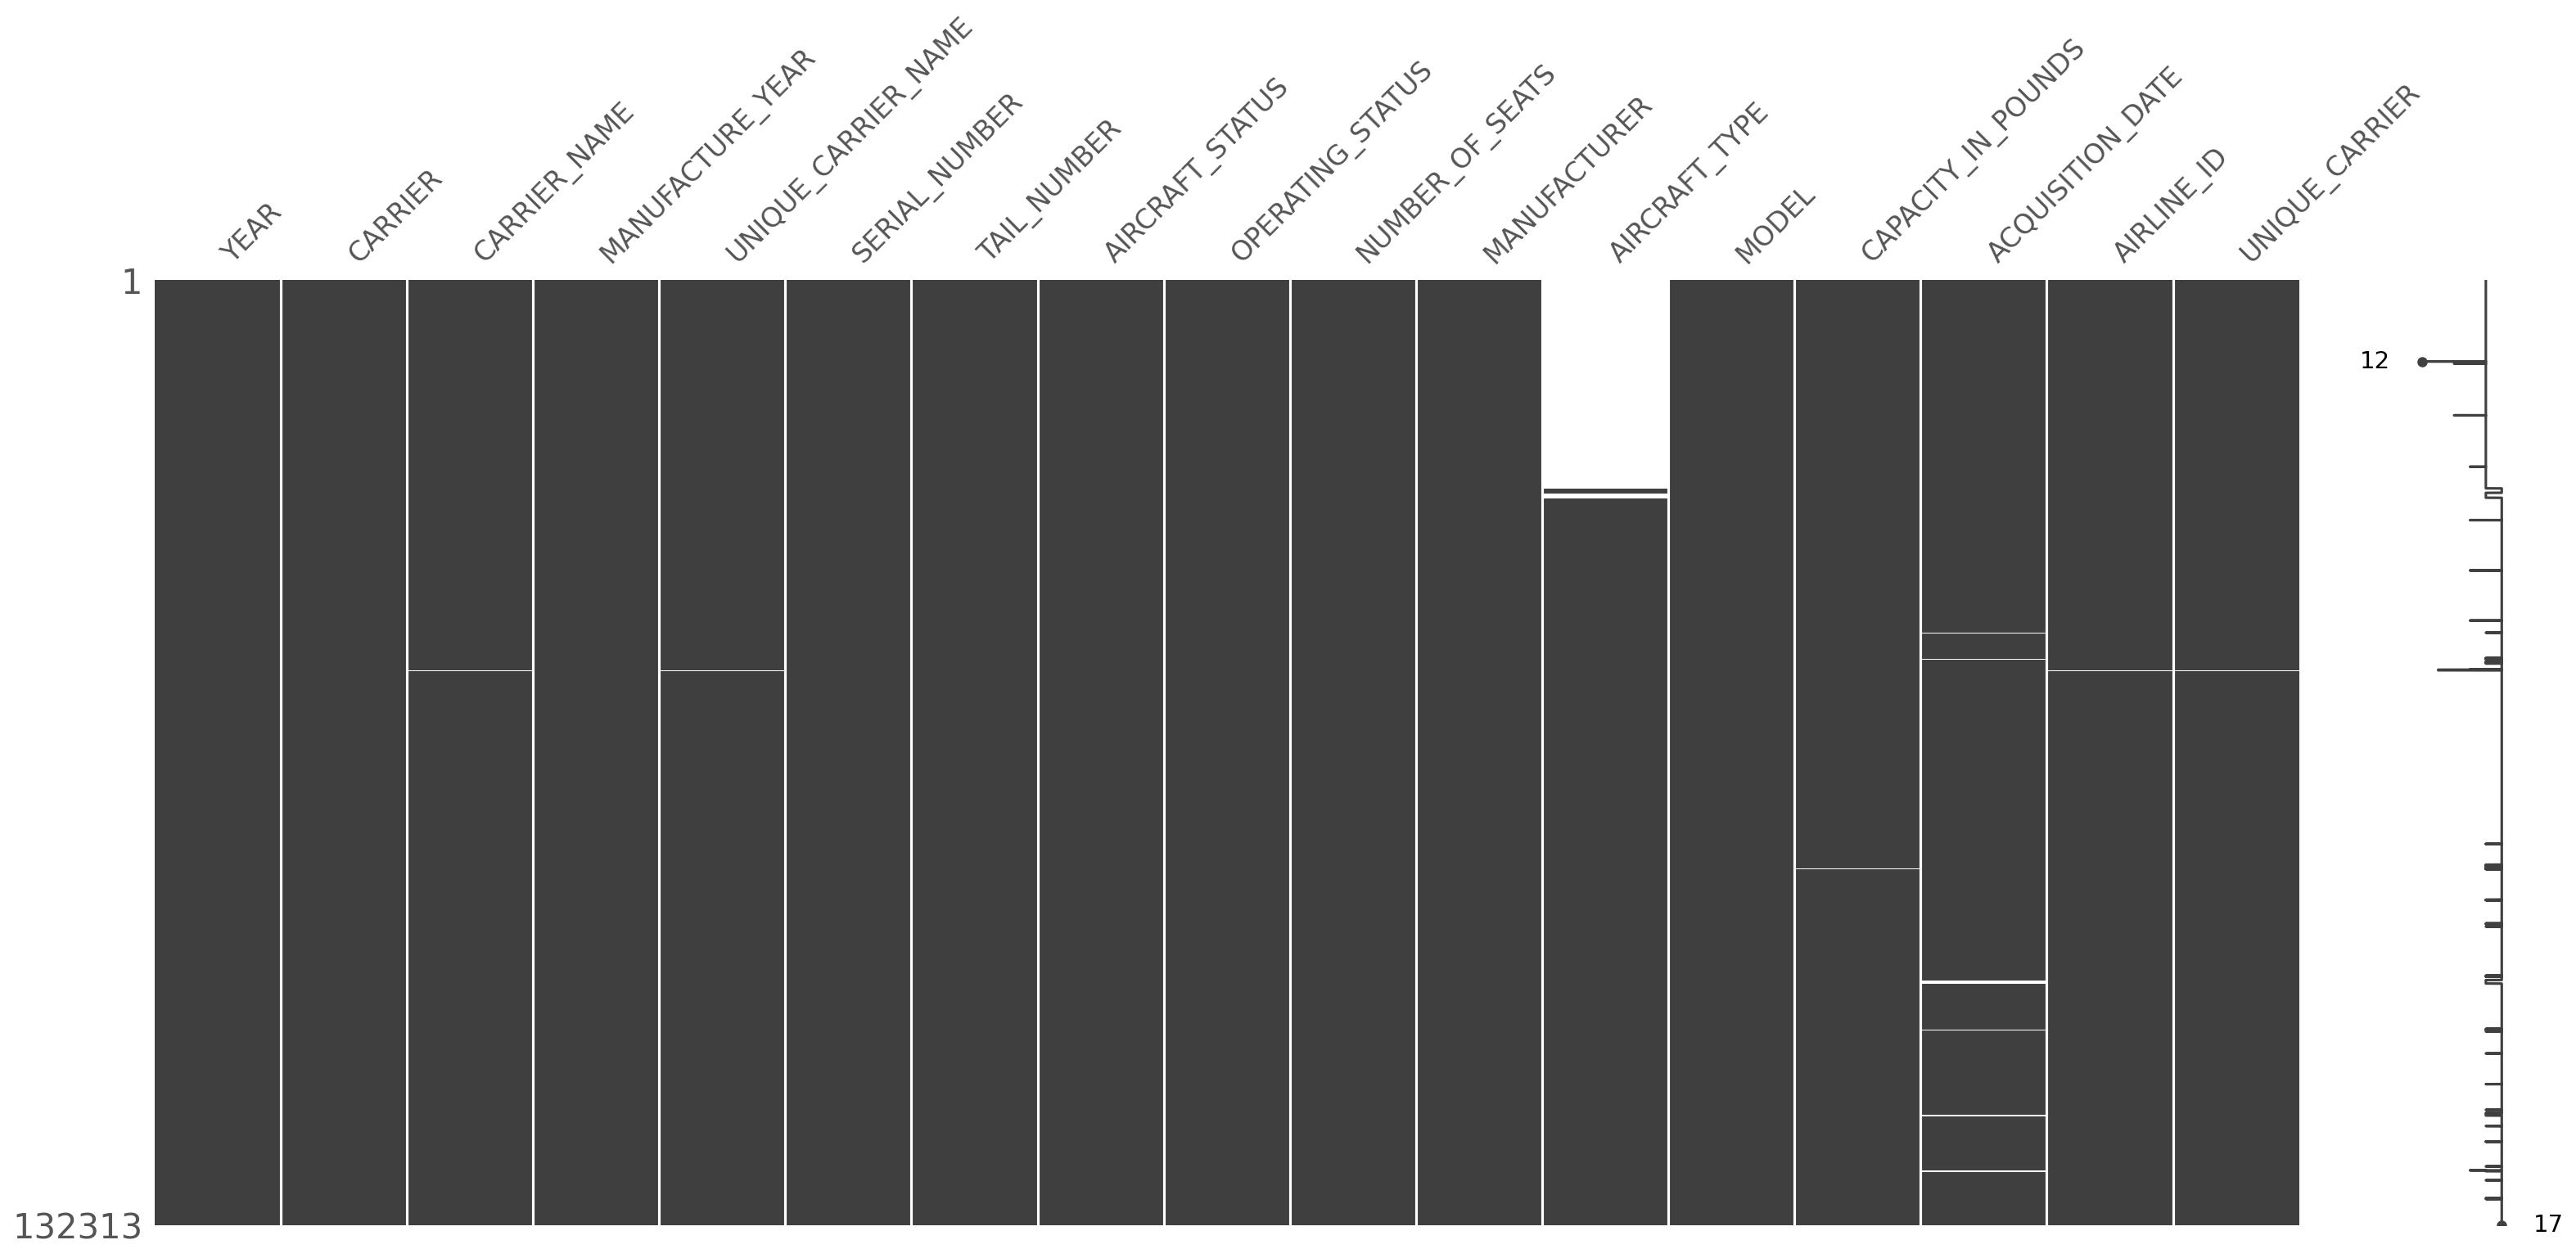

In [39]:
# %pip install missingno
import missingno as msno

msno.matrix(inventory)

In [40]:
def get_info(pd_frame):
    # generate descriptive statistics (like count, mean, std, min, etc.) for numeric columns
    res = pd_frame.describe().transpose()
    # calculate the missing percentage for each variable
    res['missing_percent'] = [(pd_frame.shape[0] - res.loc[ind, 'count'])/pd_frame.shape[0] for ind in res.index]
    # 
    res['unique_val'] = [len(pd_frame.loc[:,ind].value_counts()) for ind in res.index]
    res['var_type'] = ['Continuous' if res.loc[ind, 'unique_val'] >=100 else 'Categorical' for ind in res.index]
    return res

In [46]:
def get_missing(pd_frame):
    res = pd_frame.describe().transpose()
    # calculate the missing percentage for each variable
    res['missing_percent'] = [(pd_frame.shape[0] - res.loc[ind, 'count'])/pd_frame.shape[0] for ind in res.index]
    return res

In [41]:
inventory_num = get_info(inventory)
inventory_num

,count,mean,std,min,25%,50%,75%,max,missing_percent,unique_val,var_type
YEAR,132313.0,2014.657706,5.270037,2006.0,2010.0,2015.0,2019.0,2023.0,0.000000,18,Categorical
MANUFACTURE_YEAR,132310.0,2000.399992,39.630346,0.0,1995.0,2001.0,2007.0,2756.0,0.000023,76,Categorical
NUMBER_OF_SEATS,132306.0,110.619859,77.424860,0.0,50.0,125.0,160.0,737.0,0.000053,257,Continuous
CAPACITY_IN_POUNDS,132212.0,71313.508131,87093.991985,0.0,34446.0,43400.0,82012.0,875000.0,0.000763,2345,Continuous
AIRLINE_ID,132208.0,20051.606559,380.917190,19386.0,19805.0,19977.0,20366.0,22085.0,0.000794,112,Continuous


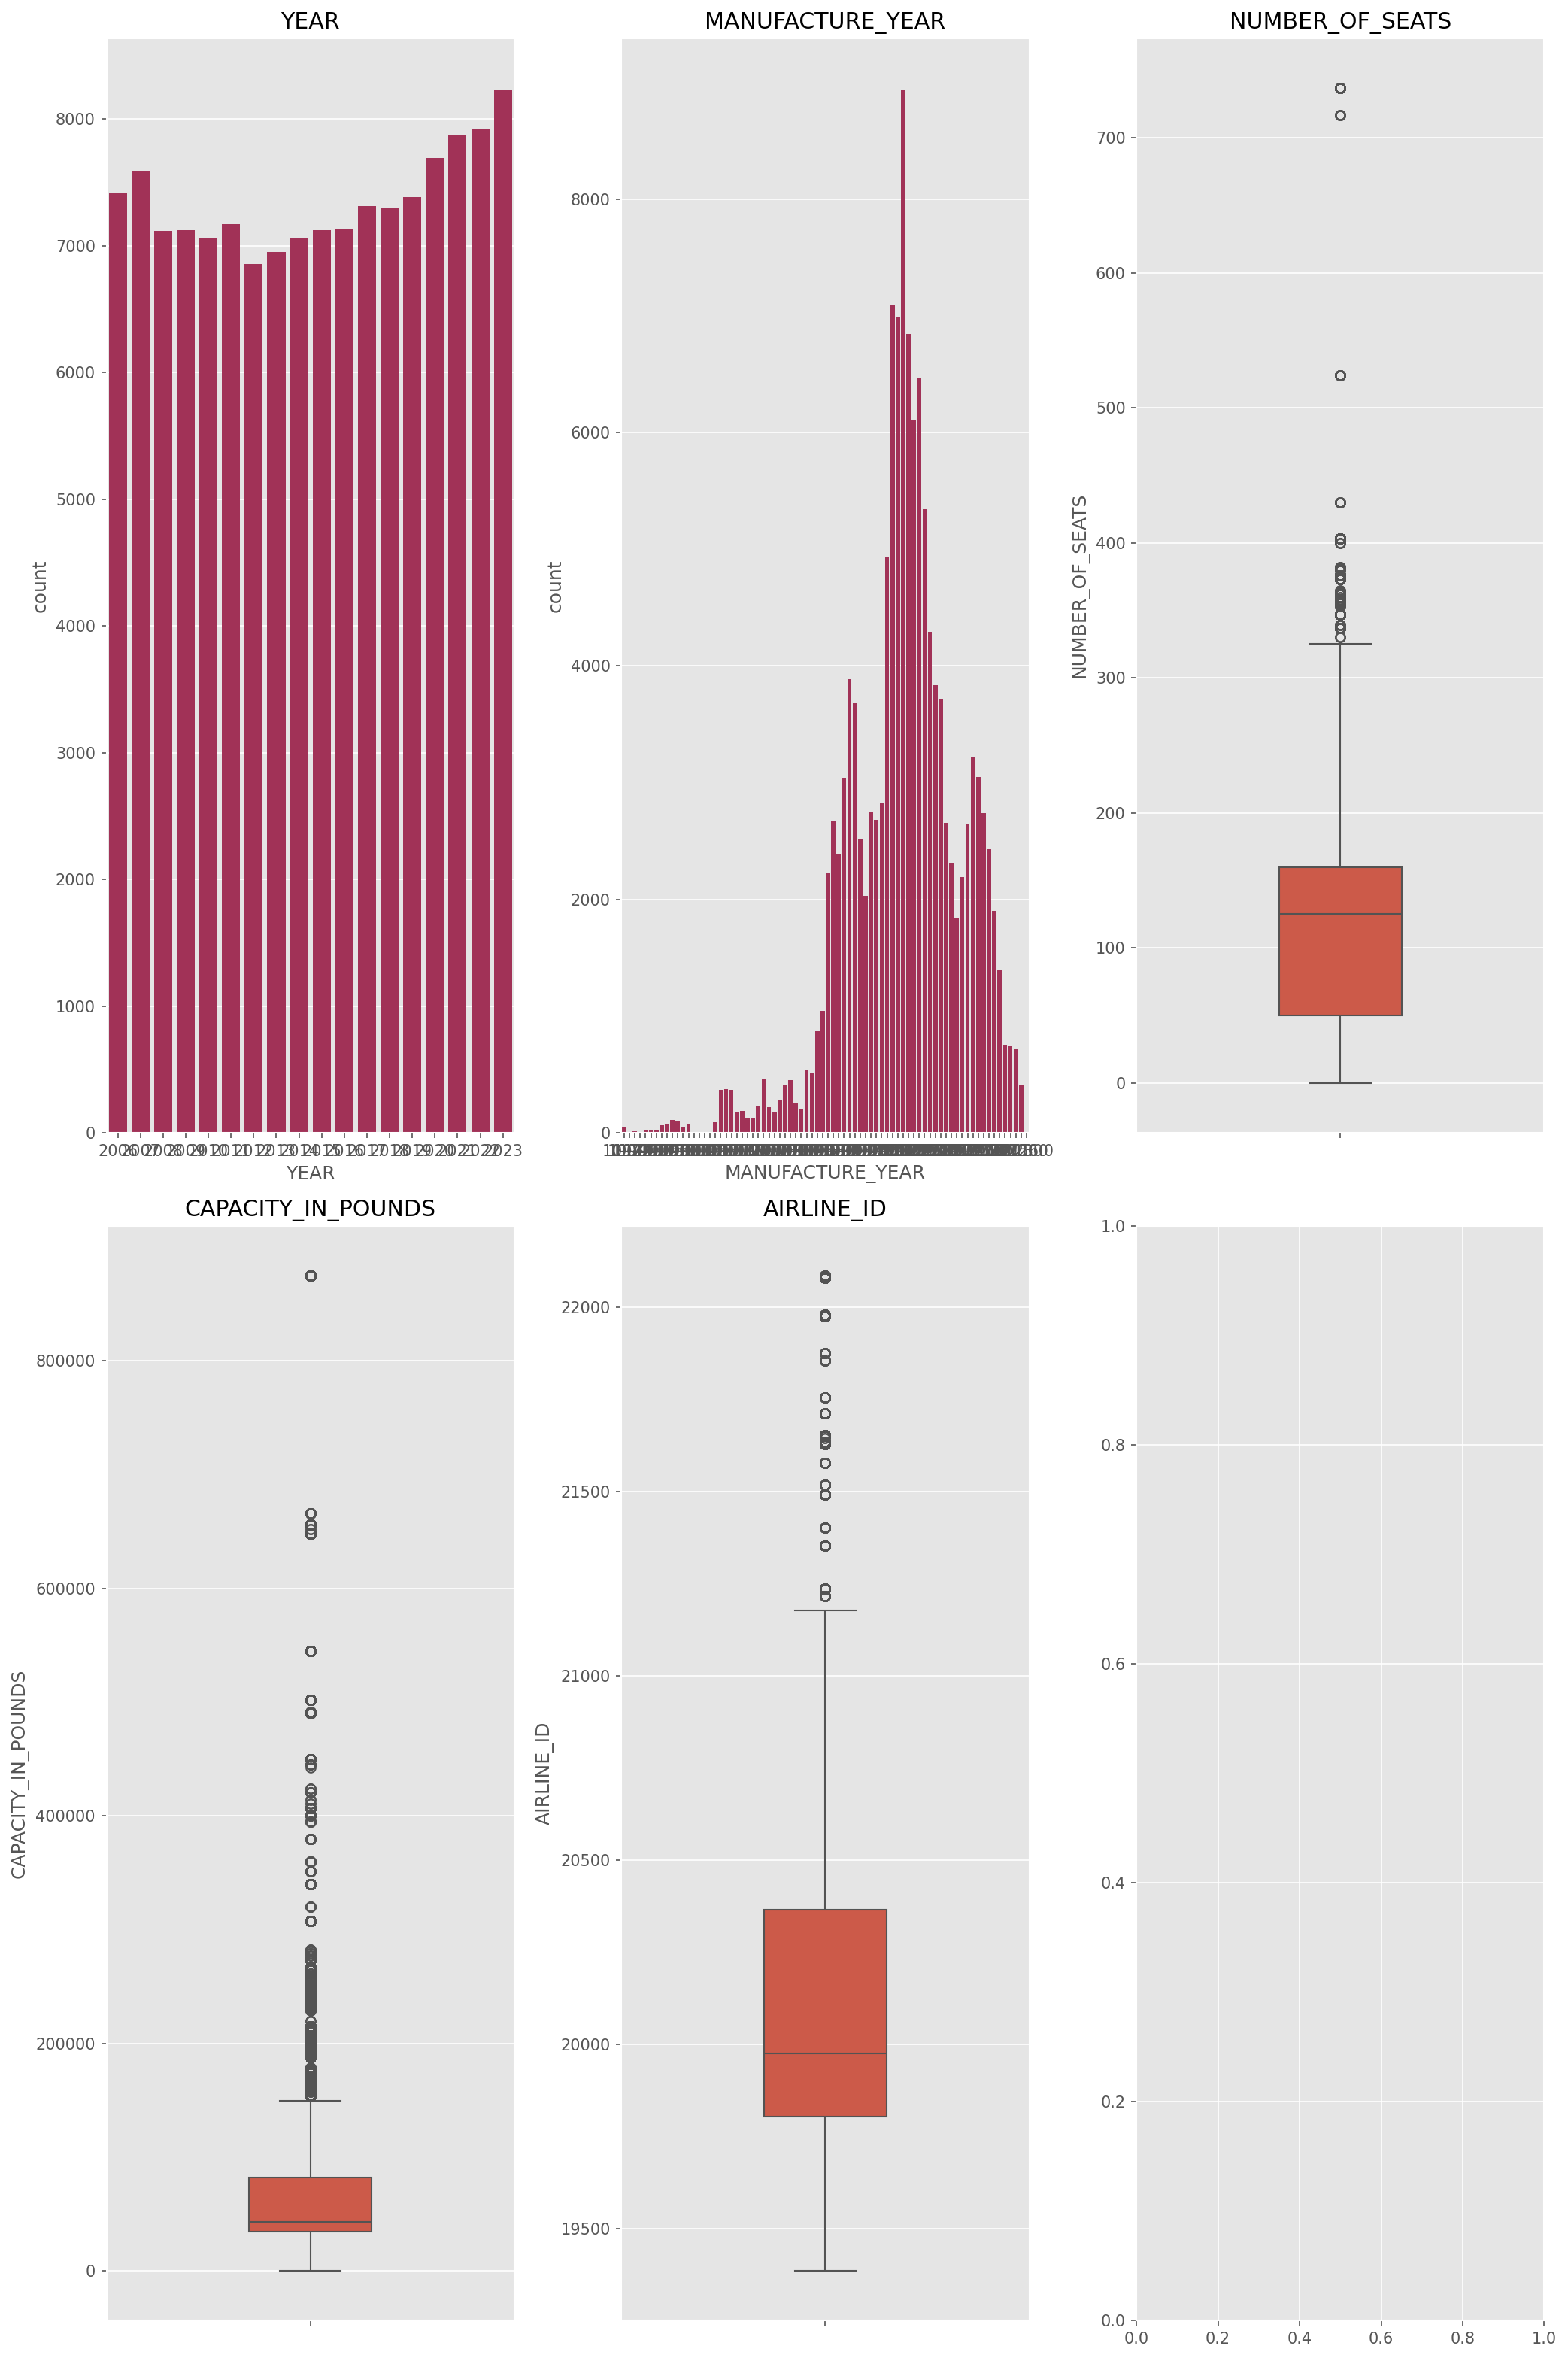

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams.update(**{'figure.dpi':150})
plt.style.use('ggplot') # can skip this - plots are more visually appealing with this style

fig,axs = plt.subplots(2,3,figsize=(14,21))

for i,ind in enumerate(inventory_num.index):
    # 2019 data

    # if the value type is continuous, we will use boxplot
    if inventory_num.loc[ind, 'var_type'] == 'Continuous':
        sns.boxplot(inventory,y=ind,ax=axs[i//3, i%3],width=0.3)
        
    # if the value type is discrete, we will use bar chart
    else:
        sns.countplot(data=inventory,x=ind,color="#b41f51",ax=axs[i//3, i%3])
    
    axs[i//3, i%3].set_title(ind)

    


fig.tight_layout()

# Submission guidelines
Your submission should be contained in a `homework_1` folder of your Github repository, and it should include 
- a `readme.md` file including how to run the code and what your expected outputs are (if the code is run), 
- your source code, and
- a `.pdf` or `.html` file containing your written answers.

# Generative AI disclosure

*Syllabus* policy: 

Required disclosure: each submission must include an AI Usage note stating: (1) tool(s) used, (2) the key prompt(s), and (3) what you changed and how you verified the results. If none, write: “AI Usage: None.”